Лабораторная работа 1: «Метод обратного распространения ошибки»

Выполнил студент группы 3824М1ПМвм Шокуров Даниил

# Задачи работы

Выполнение лабораторной работы предполагает решение следующих задач:

1. Изучить общую схему работы метода обратного распространения ошибки с использованием стохастического градиентного спуска.
2. Вывести математические формулы для вычисления градиентов функции ошибки по параметрам нейронной сети и формул коррекции весов.
3. Загрузить набор данных MNIST, выполнить предобработку изображений и меток, если это необходимо.
4. Реализовать и протестировать метод обратного распространения ошибки для задачи классификации рукописных цифр из набора данных MNIST.


# Теоретическая часть

## Общая схема работы метода обратного распространения ошибки с использованием стохастического градиентного спуска.

- Метод обратного распространения ошибки определяет
стратегию изменения параметров сети $𝑤$ в ходе обучения
с использованием градиентных методов оптимизации
- Градиентные методы на каждом шаге уточняют значения
параметров:
$𝑤(𝑘 + 1) = 𝑤(𝑘) + 𝜂 \cdot 𝑝(𝑤)$
- $𝜂$, $0 < 𝜂 < 1$ – скорость обучения (learning rate) –
«скорость» движения в направлении минимального
значения функции,
- $𝑝(𝑤)$ – направление в многомерном пространстве
параметров нейронной сети
- В классическом методе обратного распространения ошибки
направление движения совпадает с направлением
антиградиента $𝑝(𝑤) = −𝛻𝐸(𝑤(𝑘))$ на $𝑘$-ой итерации метод

- Инициализация синаптических весов сети
(случайным образом из некоторого распределения)
- Повторение следующих шагов для каждого примера
тренировочного набора данных <br>
1. Прямой проход: <br>
1.1. Вычисление значений выходных сигналов нейронов всех слоев <br>
1.2. Вычисление значений производных функций активации на каждом
слое сети
2. Обратный проход: <br>
2.1. Вычисление значения целевой функции и ее градиента <br>
2.2. Корректировка синаптических весов
- Критерии остановки: число итераций метода (количество
проходов по всему множеству примеров), достигнутая ошибка

## Конфигурация сети

Из постановки задачи получаем сеть $m$ входных нейронов, $k$ классов: <br>
- $m$ входных нейронов $x_{i}$. Полносвязный слой: <br> $u_{j}^{(1)} = \sum_{i=0}^{m} w_{ij}^{(1)}*x_{i}$, $j=\overline{0, s}$
- Функция активации relu: <br> $v_{i}^{(1)} = relu(u_{i}^{(1)})$
- Выходной слой: $u_{j}^{(1)} = \sum_{i=0}^{k}w_{ij}^{(2)} \cdot v_{i}^{(1)}$, $j=\overline{0, k}$
- Функция активации softmax: <br> $v_{i}^{(2)}=\sigma(u_{i}^{(2)})$
- Функция потерь кросс-энтропия: <br> $L=- \frac{1}{N} \sum_{i=0}^{k} y_{i} \cdot \ln(v_{i}^{(2)})$


Получим формулы для метода обратного распространения ошибок: <br>
$$
\frac{dL}{dv^{(2)}_{i}} = -y_{i} \cdot \frac{1}{v_{i}^{(2)}}
$$
$$
\frac{dv^{(2)}_{i}}{du^{(2)}_{j}} = u^{(2)}_{i} \cdot (I(i=j) - u^{(2)}_j)
$$
Тогда производная по выходному слою примет вид:
$$
 \frac{dL}{du^{(2)}_{j}} =
 \sum_{i=0}^{k} \frac{dL}{dv^{(2)}_{i}} \cdot \frac{dv^{(2)}_{i}}{du^{(2)}_{j}}= -\sum_{i=0}^{k} y_{i} \cdot \frac{1}{v_{i}^{(2)}} \cdot v^{(2)}_{i} \cdot (I(i=j) - v^{(2)}_j)
= -\sum_{i=0}^{k} y_{i} \cdot I(i=j) + v^{(2)}_j \sum_{j=0}^{k} y_{i}
= v^{(2)}_j - y_{j}
$$
Производная $u^{(2)}_{j}$ по весам $w^{(2)}_{ij}$:
$$
\frac{du^{(2)}_{j}}{dw^{(2)}_{ij}} = v^{(1)}_i
$$
Производная функции потерь по весам $w^{(2)}_{ij}$ примет вид: <br>
$$
\frac{dL}{dw^{(2)}_{ij}} = \frac{dL}{du^{(2)}_{j}} \cdot \frac{du^{(2)}_{j}}{dw^{(2)}_{ij}}
$$
Производная relu: <br>
$$\frac{du^{(1)}_{i}}{dv^{(1)}_{i}} = \frac{d(relu(v^{(1)}_{i}))}{dv^{(1)}_{i}} = \left\{
\begin{aligned}
& \text{1, $v^{(1)}_{i} > 0$} \\
& \text{0, $v^{(1)}_{i} \leq 0$}
\end{aligned}
\right.$$
Производная функции потерь по весам $w^{(1)}_{ij}$ примет вид: <br>
$$
\frac{dL}{dw^{(1)}_{ij}} = \frac{dL}{du^{(1)}_{j}} \cdot \frac{du^{(1)}_{j}}{dw^{(1)}_{ij}} = \frac{dL}{dv^{(1)}_{j}} \cdot \frac{dv^{(1)}_{j}}{du^{(1)}_{j}} \cdot \frac{du^{(1)}_{j}}{dw^{(1)}_{ij}} = \frac{dL}{dv^{(1)}_{j}} \cdot \frac{dv^{(1)}_{j}}{du^{(1)}_{j}} \cdot \frac{du^{(1)}_{j}}{dw^{(1)}_{ij}} = \sum_{k=0}^{n} \frac{dL}{du^{(2)}_{k}} \cdot \frac{du^{(2)}_{k}}{dv^{(1)}_{j}} \cdot \frac{dv^{(1)}_{j}}{du^{(1)}_{j}} \cdot \frac{du^{(1)}_{j}}{dw^{(1)}_{ij}} = \sum_{k=0}^{n} (v^{(2)}_k - y_{k}) \cdot w^{(1)}_{jk} \cdot \frac{d(relu(v^{(1)}_{j}))}{dv^{(1)}_{j}} \cdot x_{i}
$$

# Практическая часть

In [ ]:
import numpy as np
import keras
import time
import keras.datasets
from matplotlib import pyplot as plt

In [ ]:
def softmax(Z):
  # Стабильный softmax
  exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
  return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [ ]:
class Network:
  def __init__(self, input_size, hidden_size, output_size):
    # Начальные значения весов
    np.random.seed(47)
    self.W1 = np.random.normal(0, np.sqrt(2.0 / hidden_size), (hidden_size, input_size)) * 0.01
    self.b1 = np.random.normal(0, np.sqrt(2.0 / hidden_size), (hidden_size, 1)) * 0.01
    self.W2 = np.random.normal(0, np.sqrt(2.0 / output_size), (output_size, hidden_size))
    self.b2 = np.random.normal(0, np.sqrt(2.0 / output_size), (output_size, 1)) * 0.01

  def forward_propagation(self, x, y, batch_size):
    self.N = batch_size
    self.x = x
    self.y = y
    self.z1 = self.W1 @ self.x + self.b1
    self.a1 = np.maximum(self.z1, 0)
    self.z2 = self.W2 @ self.a1 + self.b2
    self.a2 = softmax(self.z2)
    return -np.mean(self.y * np.log(np.clip(self.a2, 1e-8, 1.0 - 1e-8)))

  def predict(self, x):
    z1 = self.W1 @ x + self.b1
    a1 = np.maximum(z1, 0)
    z2 = self.W2 @ a1 + self.b2
    return softmax(z2)

  def back_propagation(self):
    dz2 = self.a2 - self.y
    self.dW2 = dz2 @ self.a1.T / self.N
    self.db2 = np.sum(dz2, axis=1, keepdims=True) / self.N

    da1 = self.W2.T @ dz2

    dz1 = np.where(self.z1 > 0, 1, 0) * da1
    self.dW1 = dz1 @ self.x.T / self.N
    self.db1 = np.sum(dz1, axis=1, keepdims=True) / self.N

  def update_weight(self, learning_rate):
    self.W2 = self.W2 - learning_rate * self.dW2
    self.b2 = self.b2 - learning_rate * self.db2
    self.W1 = self.W1 - learning_rate * self.dW1
    self.b1 = self.b1 - learning_rate * self.db1

In [ ]:
(_X_train, _y_train), (_X_test, _y_test) = keras.datasets.mnist.load_data()

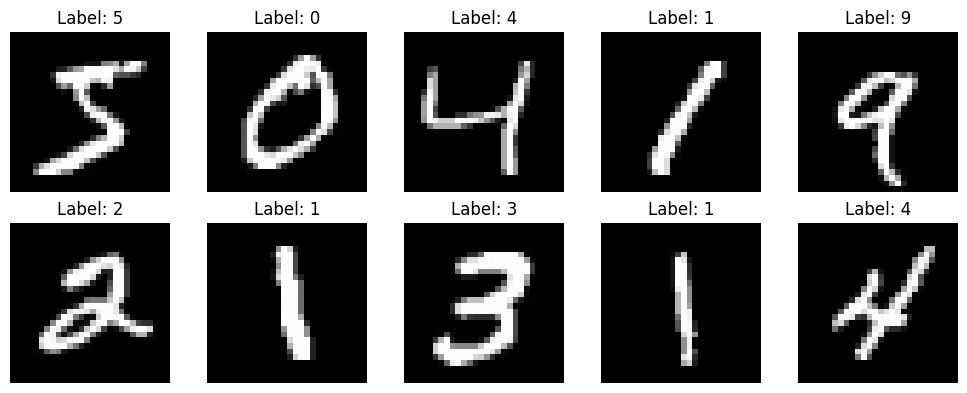

In [ ]:
# Визуализация примеров
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(_X_train[i], cmap='gray')
    plt.title(f'Label: {_y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Нормализация весов
X_train = _X_train / 255
X_test = _X_test / 255

In [ ]:
# One hot encoding
y_train = keras.utils.to_categorical(_y_train, 10)
y_test = keras.utils.to_categorical(_y_test, 10)

In [ ]:
N = len(X_train)

In [ ]:
def show_image(img, ax=None, title=None):
    """Shows a single image."""
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)

In [ ]:
def prepare_data(x_samples, y_samples):
  samples_size = len(x_samples)
  x_samples.resize(samples_size, 28 * 28)
  return x_samples.T, y_samples.T, samples_size

In [ ]:
epoch_num = 20
batch_size = 32
learning_rate = 0.1
s = 300

In [ ]:
obj = Network(28 * 28, s, 10)

In [ ]:
data_size = len(X_train)
for epoch in range(0, epoch_num):
  common_loss = 0
  start_time = time.time()
  for idx in range(0, data_size, batch_size):
    # format data
    _X, _y, sample_size = prepare_data(X_train[idx:idx + batch_size], y_train[idx:idx + batch_size])
    obj.forward_propagation(_X, _y, sample_size)
    obj.back_propagation()
    obj.update_weight(learning_rate)
  end_time = time.time()
  _X, _y, sample_size = prepare_data(X_train, y_train)
  pred_res = np.argmax(obj.predict(_X), axis=0)
  train_res = np.argmax(y_train, axis=1)
  acc = np.sum(pred_res == train_res) / data_size
  print(f"Точность на тренировочном наборе: {acc:.5f}")
  print(f"Время выполнения эпохи: {end_time - start_time:.2f} секунд")

Точность на тренировочном наборе: 0.95285
Время выполнения эпохи: 6.85 секунд
Точность на тренировочном наборе: 0.96662
Время выполнения эпохи: 6.40 секунд
Точность на тренировочном наборе: 0.97305
Время выполнения эпохи: 8.56 секунд
Точность на тренировочном наборе: 0.97660
Время выполнения эпохи: 5.96 секунд
Точность на тренировочном наборе: 0.97963
Время выполнения эпохи: 8.56 секунд
Точность на тренировочном наборе: 0.98352
Время выполнения эпохи: 9.07 секунд
Точность на тренировочном наборе: 0.98563
Время выполнения эпохи: 5.96 секунд
Точность на тренировочном наборе: 0.98780
Время выполнения эпохи: 8.61 секунд
Точность на тренировочном наборе: 0.98927
Время выполнения эпохи: 8.39 секунд
Точность на тренировочном наборе: 0.99027
Время выполнения эпохи: 5.77 секунд
Точность на тренировочном наборе: 0.99117
Время выполнения эпохи: 8.45 секунд
Точность на тренировочном наборе: 0.99177
Время выполнения эпохи: 8.41 секунд
Точность на тренировочном наборе: 0.99225
Время выполнения эпохи

In [ ]:
# Точность на тестовом наборе
_X, _y, sample_size = prepare_data(X_test, y_test)
pred_res = np.argmax(obj.predict(_X), axis=0)
true_res = _y_test.T
acc = np.sum(pred_res == true_res) / sample_size
print("test accuracy:", acc)

test accuracy: 0.9764


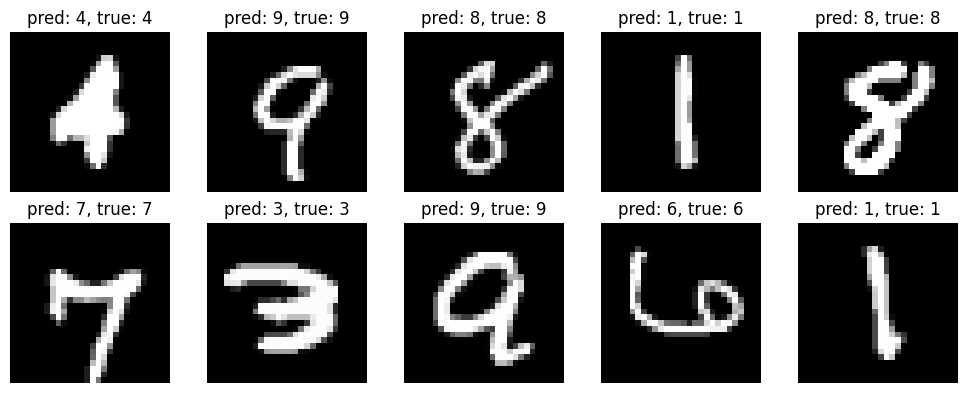

In [ ]:
# Визуализация примеров
plt.figure(figsize=(10, 4))
numbs = np.random.randint(0, len(_X_test), 10)

for i in range(10):
    numb = numbs[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(_X_test[numb], cmap='gray')
    plt.title(f'pred: {pred_res[numb]}, true: {true_res[numb]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Найдем несовпадения
indexes = np.where(pred_res != true_res)[0]

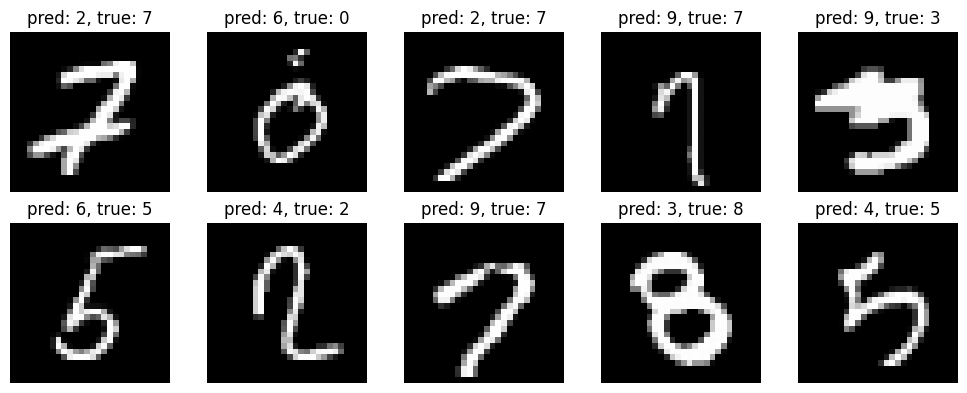

In [ ]:
plt.figure(figsize=(10, 4))

numbs = [indexes[np.random.randint(0, len(indexes))] for _ in range(10)]
for i in range(10):
    numb = numbs[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(_X_test[numb], cmap='gray')
    plt.title(f'pred: {pred_res[numb]}, true: {true_res[numb]}')
    plt.axis('off')
plt.tight_layout()
plt.show()